In [1]:
# Enable matplotlib interactive mode
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)
# #running the model through EMA workbench
# from ema_workbench import (MultiprocessingEvaluator, ema_logging,
#                        perform_experiments, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy
from ema_workbench import load_results

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\Frenk VanDerKraan\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


<Logger EMA (DEBUG)>

# load result of problem formulation 1 
these results show the deaths, costs and investments of the whole Ijsel area

In [2]:
# Load results that were previously generated
load_file_name ='results/4000  base scenarios policy pf 1.tar.gz'
experiments, outcomes = load_results(load_file_name)

[MainProcess/INFO] results loaded successfully from C:\Users\Frenk VanDerKraan\Documents\TUDelft\final assignment\results\4000  base scenarios policy pf 1.tar.gz


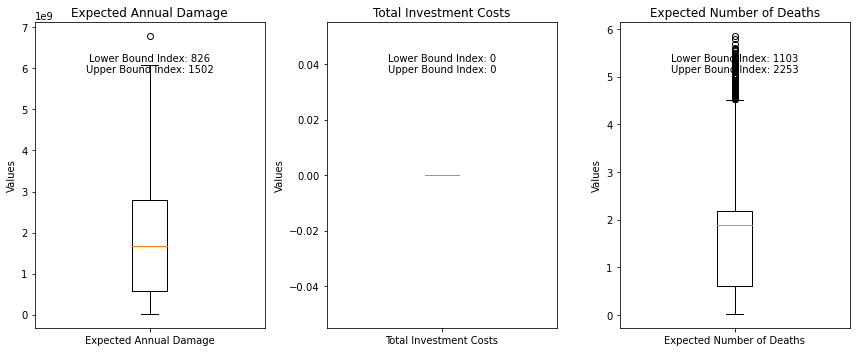

In [3]:
# Create a figure and subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Iterate over the dictionary and create a boxplot for each key-value pair
for i, (key, values) in enumerate(outcomes.items()):
    # Create a boxplot on the corresponding axis
    axs[i].boxplot(values)
    
    # Calculate the upper and lower bounds
    lower_bound = np.min(values)
    upper_bound = np.max(values)
    
    # Find the index of the upper and lower bounds
    lower_index = np.argmin(values)
    upper_index = np.argmax(values)
    
    # Set labels and title for the subplot
    axs[i].set_xticklabels([key])
    axs[i].set_ylabel('Values')
    axs[i].set_title(key)
    
    # Display the index of the upper and lower bounds
    axs[i].text(0.5, 0.9, f"Lower Bound Index: {lower_index}\nUpper Bound Index: {upper_index}", 
                transform=axs[i].transAxes, ha='center', va='top')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# load result of problem formulation 2 
This problem formulation show the deaths and total cost of each dike ring seperate

In [4]:
# Load results that were previously generated
load_file_name ='results/4000  base scenarios policy pf 3.tar.gz'
experiments, outcomes = load_results(load_file_name)

[MainProcess/INFO] results loaded successfully from C:\Users\Frenk VanDerKraan\Documents\TUDelft\final assignment\results\4000  base scenarios policy pf 3.tar.gz


### Combine dike ring 4 and 5 to get the Overijsel dikerings

In [5]:
# outcome_names_overijssel = outcome_names_ring_4 + outcome_names_ring_5
cost_ring_4 = outcomes['A.4 Total Costs']
cost_ring_5 = outcomes['A.5 Total Costs']
fatalities_ring_4 = outcomes['A.4_Expected Number of Deaths']
fatalities_ring_5 = outcomes['A.5_Expected Number of Deaths']


outcomes['overijssel Total Costs'] = cost_ring_4 + cost_ring_5
outcomes['overijssel_Expected Number of Deaths'] = fatalities_ring_4 + fatalities_ring_5

# print(cost_ring_4[5] + cost_ring_5[5])
# print(cost_overijssel[5])


experiments_ring_4 = experiments.loc[:, 'A.4_Bmax':'A.4_pfail']
experiments_ring_5 = experiments.loc[:, 'A.5_Bmax':'A.5_pfail']
experiments_overijssel = experiments.loc[:, 'A.4_Bmax':'A.5_pfail']

In [6]:
outcomes

{'A.1 Total Costs': array([1.01140572e+07, 0.00000000e+00, 1.22143253e+07, ...,
        2.79498711e+09, 3.01613543e+09, 0.00000000e+00]),
 'A.1_Expected Number of Deaths': array([0.00957795, 0.        , 0.00944172, ..., 1.72810017, 1.75536139,
        0.        ]),
 'A.2 Total Costs': array([3.92952442e+07, 2.17366279e+07, 7.92290131e+07, ...,
        0.00000000e+00, 0.00000000e+00, 3.62168271e+08]),
 'A.2_Expected Number of Deaths': array([0.04902306, 0.02026599, 0.07932336, ..., 0.        , 0.        ,
        0.38074471]),
 'A.3 Total Costs': array([1.45851054e+09, 1.04458490e+08, 1.77833964e+09, ...,
        0.00000000e+00, 1.28483495e+08, 0.00000000e+00]),
 'A.3_Expected Number of Deaths': array([3.18746563, 0.17960798, 3.17318743, ..., 0.        , 0.19016009,
        0.        ]),
 'A.4 Total Costs': array([       0.        , 30320997.82534011, 47503354.25628907, ...,
               0.        ,   514266.0994432 ,        0.        ]),
 'A.4_Expected Number of Deaths': array([0.   

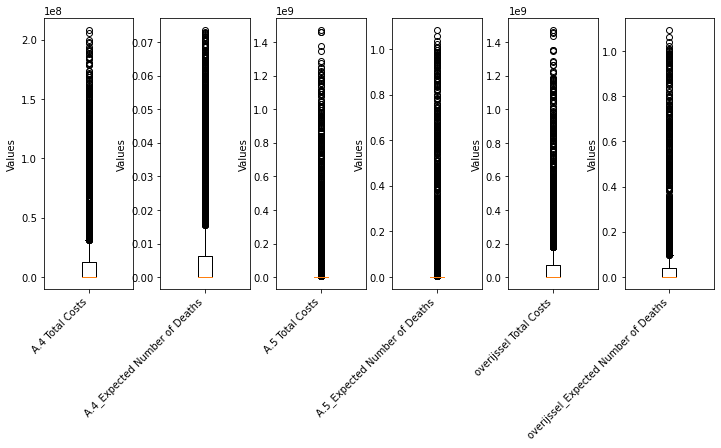

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the dictionary based on keys
filtered_outcomes = {key: values for key, values in outcomes.items() if key.startswith('A.4') or key.startswith('A.5') or key.startswith('overijssel')}

# Determine the number of subplots based on the number of filtered key-value pairs
num_subplots = len(filtered_outcomes)

# Create a figure and subplots based on the number of filtered key-value pairs
fig, axs = plt.subplots(1, num_subplots, figsize=(12, 5), sharey=False)

# Iterate over the filtered dictionary and create a boxplot for each key-value pair
for i, (key, values) in enumerate(filtered_outcomes.items()):
    # Create a boxplot on the corresponding axis
    ax = axs[i]
    ax.boxplot(values)
    
    # Calculate the upper and lower bounds
    lower_bound = np.min(values)
    upper_bound = np.max(values)
    
    # Find the index of the upper and lower bounds
    lower_index = np.argmin(values)
    upper_index = np.argmax(values)
    
    # Set labels and title for the subplot
    ax.set_xticklabels([key], rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align right
    ax.set_ylabel('Values')
    # ax.set_title(key)
    
    # # Display the index of the upper and lower bounds
    # ax.text(0.5, 0.9, f"Lower Bound Index: {lower_index}\nUpper Bound Index: {upper_index}", 
    #         transform=ax.transAxes, ha='center', va='top')

# Adjust the spacing between subplots and rotate the x-axis labels
plt.subplots_adjust(wspace=0.3)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

